# Sentiment Analysis with IMDB Dataset Using RNN

In [5]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [6]:
# Load the dataset from TensorFlow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 8s 0us/step


In [7]:
# Display dataset information
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")
print("First training sample (encoded):", X_train[0])


Training samples: 25000, Testing samples: 25000
First training sample (encoded): [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16

In [8]:
# Decode an example to understand the data
word_index = tf.keras.datasets.imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in X_train[0]])
print("\nDecoded Review Example:", decoded_review)


1641221/1641221 [==============================] - 1s 1us/step

Decoded Review Example: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film bu

In [9]:
# Pad sequences to make them of uniform length
X_train = pad_sequences(X_train, maxlen=200)
X_test = pad_sequences(X_test, maxlen=200)

print("Shape of X_train after padding:", X_train.shape)

Shape of X_train after padding: (25000, 200)


In [10]:
# Define the model architecture
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=200),  # Embedding layer
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),                # LSTM layer
    Dense(64, activation='relu'),                                # Fully connected layer
    Dropout(0.5),                                                # Dropout for regularization
    Dense(1, activation='sigmoid')                               # Output layer for binary classification
])

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [12]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 677249 (2.58 MB)
Trainable params: 677249 (2.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Train the model on the IMDB dataset
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=5,
    batch_size=64
)


Epoch 1/5
391/391 [==============================] - 403s 1s/step - loss: 0.4677 - accuracy: 0.7713 - val_loss: 0.3544 - val_accuracy: 0.8537
Epoch 2/5
391/391 [==============================] - 404s 1s/step - loss: 0.2651 - accuracy: 0.8986 - val_loss: 0.3058 - val_accuracy: 0.8694
Epoch 3/5
391/391 [==============================] - 449s 1s/step - loss: 0.2052 - accuracy: 0.9233 - val_loss: 0.3277 - val_accuracy: 0.8689
Epoch 4/5
391/391 [==============================] - 251s 640ms/step - loss: 0.1541 - accuracy: 0.9439 - val_loss: 0.4124 - val_accuracy: 0.8641
Epoch 5/5
391/391 [==============================] - 182s 466ms/step - loss: 0.1167 - accuracy: 0.9574 - val_loss: 0.4028 - val_accuracy: 0.8549


In [14]:
  # Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

782/782 [==============================] - 16s 20ms/step - loss: 0.4028 - accuracy: 0.8549
Test Accuracy: 85.49%


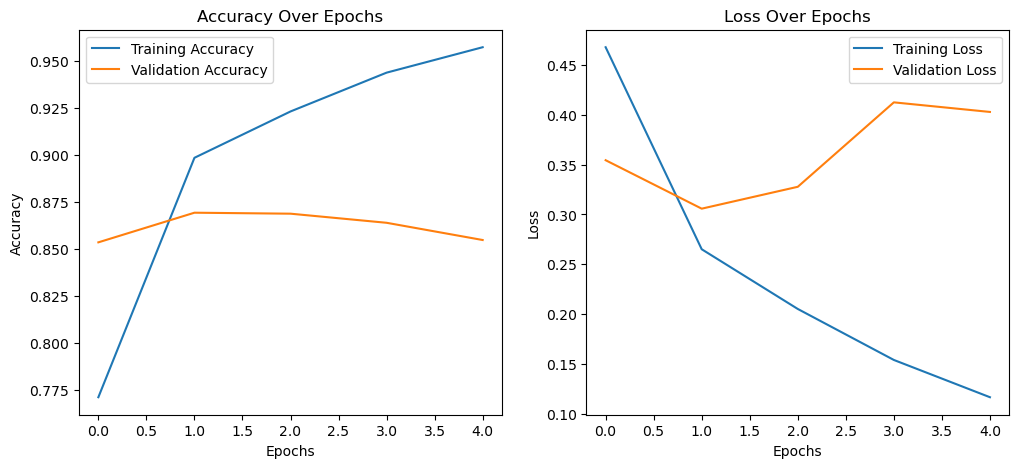

In [20]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [30]:
# Test the model with custom reviews
custom_reviews = [
    "I would recommend it to everyone to watch and the fly fishing was amazing",
    "The plot was dull and boring. I wasted my time.",
    "It was okay, not great but not bad either.",
    
]

In [31]:
# Convert custom reviews to sequences
def preprocess_custom_review(review, word_index, maxlen=200):
    tokens = [word_index.get(word, 2) for word in review.lower().split()]  # Map words to indices (unknown = 2)
    return pad_sequences([tokens], maxlen=maxlen)

In [32]:
# Preprocess and predict
for review in custom_reviews:
    sequence = preprocess_custom_review(review, word_index)
    prediction = model.predict(sequence)[0][0]
    sentiment = "Positive" if prediction > 0.5 else "Negative"
    print(f"Review: {review}\nPredicted Sentiment: {sentiment} (Score: {prediction:.2f})\n")

1/1 [==============================] - 0s 35ms/step
Review: I would recommend it to everyone to watch and the fly fishing was amazing
Predicted Sentiment: Positive (Score: 0.98)

1/1 [==============================] - 0s 8ms/step
Review: The plot was dull and boring. I wasted my time.
Predicted Sentiment: Negative (Score: 0.18)

1/1 [==============================] - 0s 35ms/step
Review: It was okay, not great but not bad either.
Predicted Sentiment: Negative (Score: 0.30)

